In [1]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [2]:
train_data='/content/drive/MyDrive/Colab Notebooks/face_id_3_person/train'
test_data='/content/drive/MyDrive/Colab Notebooks/face_id_3_person/test'

In [3]:
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)

In [4]:
train_data=train.flow_from_directory(train_data,
                                      target_size=(150,150),
                                      batch_size=10,
                                      class_mode='categorical',
                                    )
test_data=test.flow_from_directory(test_data,
                                              target_size=(150,150),
                                              batch_size=10,
                                              class_mode='categorical',
                                              )

Found 180 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


In [5]:
print(train_data.class_indices)
print(test_data.class_indices)

{'Den_Vau': 0, 'Son_Tung_MTP': 1, 'son': 2}
{'Den': 0, 'Stung': 1, 'sơn': 2}


In [6]:
from keras.layers.core.flatten import Flatten
model = Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='Softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 128)               8640128   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 8,650,563
Trainable params: 8,650,563
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [8]:
history=model.fit(train_data,batch_size=10,epochs=20,verbose=1,validation_data=test_data)

Epoch 1/20
18/18 [==============================] - 72s 4s/step - loss: 25.6473 - accuracy: 0.4667 - val_loss: 1.4422 - val_accuracy: 0.7391
Epoch 2/20
18/18 [==============================] - 7s 390ms/step - loss: 8.2781 - accuracy: 0.6167 - val_loss: 5.9730 - val_accuracy: 0.6522
Epoch 3/20
18/18 [==============================] - 7s 384ms/step - loss: 5.8568 - accuracy: 0.6833 - val_loss: 3.3178 - val_accuracy: 0.6522
Epoch 4/20
18/18 [==============================] - 7s 390ms/step - loss: 5.6521 - accuracy: 0.5944 - val_loss: 1.7855 - val_accuracy: 0.6522
Epoch 5/20
18/18 [==============================] - 7s 390ms/step - loss: 2.3306 - accuracy: 0.6889 - val_loss: 3.8090 - val_accuracy: 0.6522
Epoch 6/20
18/18 [==============================] - 7s 389ms/step - loss: 2.6196 - accuracy: 0.6611 - val_loss: 1.2719 - val_accuracy: 0.6087
Epoch 7/20
18/18 [==============================] - 7s 396ms/step - loss: 3.2497 - accuracy: 0.6333 - val_loss: 0.8138 - val_accuracy: 0.6957
Epoch 8

In [ ]:
model.save('3person.h5')

In [ ]:

model1=load_model('3person.h5')

array([1])

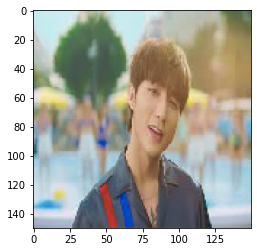

In [ ]:
img=load_img('/content/images (1).jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=1)

array([0])

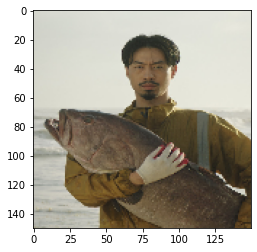

In [ ]:
import matplotlib.pyplot as plt
img=load_img('/content/ab6761610000e5eb2868ae760ec4f1ec2223b6f9.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=1)

array([2])

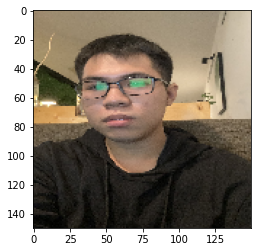

In [ ]:
import matplotlib.pyplot as plt
img=load_img('/content/58.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=1)